In [77]:
%reload_ext watermark
%watermark -a "Addi Wei" -d -t -v -p numpy,pandas,matplotlib.pyplot,numpy -g

Addi Wei 2019-03-23 08:47:16 

CPython 3.7.0
IPython 6.5.0

numpy 1.15.4
pandas 0.23.4
matplotlib.pyplot 2.2.3
numpy 1.15.4
Git hash:


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
#data below used for EDA and feature engineering
df_aisles = pd.read_csv('aisles.csv')
df_dept = pd.read_csv('departments.csv')
df_order_products_prior = pd.read_csv('order_products__prior.csv')
df_orders = pd.read_csv('orders.csv')
df_products = pd.read_csv('products.csv')

#data below used for training and testing model
df_train = pd.read_csv('order_products__train_cap.csv')
df_test = pd.read_csv('order_products__test_cap.csv')




In [86]:
df_aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [84]:
df_dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [87]:
df_order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [88]:
df_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [89]:
df_products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [90]:
df_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,36,39612,1,0
1,36,19660,2,1
2,36,49235,3,0
3,36,43086,4,1
4,36,46620,5,1


In [91]:
df_test.head()

,order_id,product_id
0,1,49302
1,1,11109
2,1,10246
3,1,49683
4,1,43633


In [7]:
#observe types of data 
print(df_aisles.dtypes)
print(df_dept.dtypes)
print(df_order_products_prior.dtypes)
print(df_orders.dtypes)
print(df_products.dtypes)

aisle_id     int64
aisle       object
dtype: object
department_id     int64
department       object
dtype: object
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object
order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object
product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object


In [14]:
#look for null values
print(df_aisles.isnull().sum())

aisle_id    0
aisle       0
dtype: int64


In [15]:
print(df_dept.isnull().sum())

department_id    0
department       0
dtype: int64


In [21]:
print(df_order_products_prior.isnull().sum())

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


In [28]:
print(df_orders.isnull().sum())
# this was only data that contained null values.
print(df_orders.shape)
print(df_orders.days_since_prior_order.isnull().sum() / len(df_orders.index))
# 6 % of data has null values for 'days since prior order'.  Don't do anything with this yet, move on to EDA 

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64
(3421083, 7)
0.06027594185817766


In [19]:
print(df_aisles.isnull().sum())

aisle_id    0
aisle       0
dtype: int64


In [20]:
print(df_products.isnull().sum())

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64


In [34]:
# Thanks to Kaggle data, not too much missing data we have to deal with, move on to some EDA
# CEO wants to know the most popular items and best departments
# 'prior' and 'train' appear to be separated for some reason so we have to concat to get total picture of order history
#merge products with prior orders in order to get product names

df_all_orders = pd.concat([df_order_products_prior, df_train])


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [59]:
# add in product name, department name, userID to our df_all

df_all = pd.merge(df_all_orders, df_products, how='left', on='product_id')
df_all = pd.merge(df_all, df_dept, how='left', on='department_id')
df_all = pd.merge(df_all, df_orders, how='left', on='order_id')

In [60]:
#Now we should see product name associated w/ orders 
df_all.head()


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,pantry,202279,prior,3,5,9,8.0


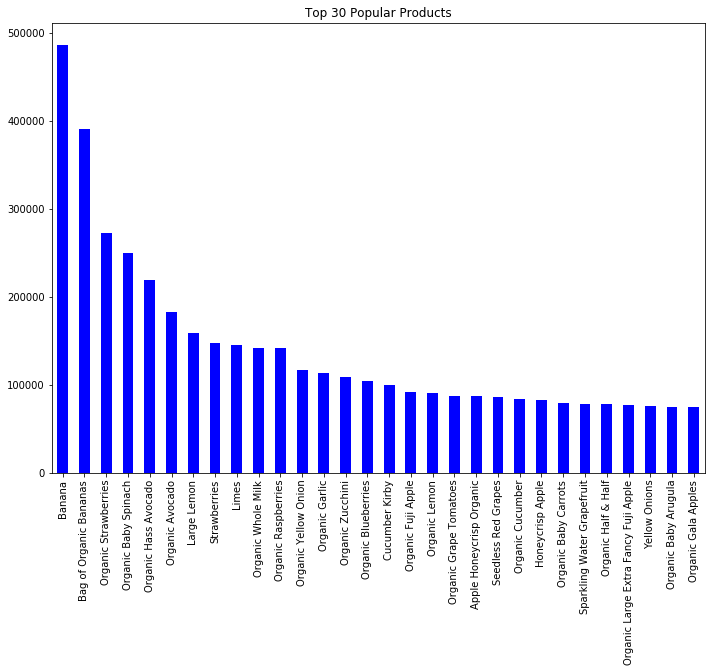

In [56]:
product_counts = df_all['product_name'].value_counts()

dims = (11.7, 8.27)
fix, ax = plt.subplots(figsize= dims)
product_counts[0:30].plot(kind="bar", color='blue')

plt.xticks(rotation=90)
plt.title('Top 30 Popular Products')
plt.show()

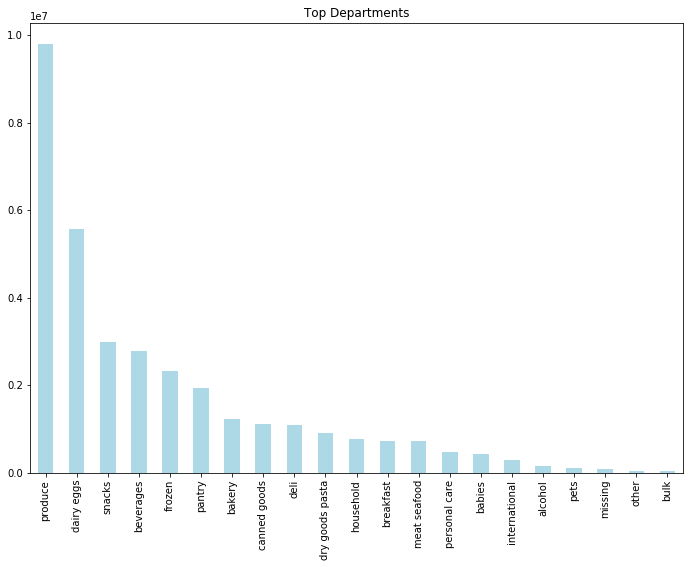

In [58]:
# Top 30 departments 

dept_counts = df_all['department'].value_counts()

dims = (11.7, 8.27)
fix, ax = plt.subplots(figsize= dims)
dept_counts[0:30].plot(kind="bar", color='lightblue')

plt.xticks(rotation=90)
plt.title('Top Departments')
plt.show()

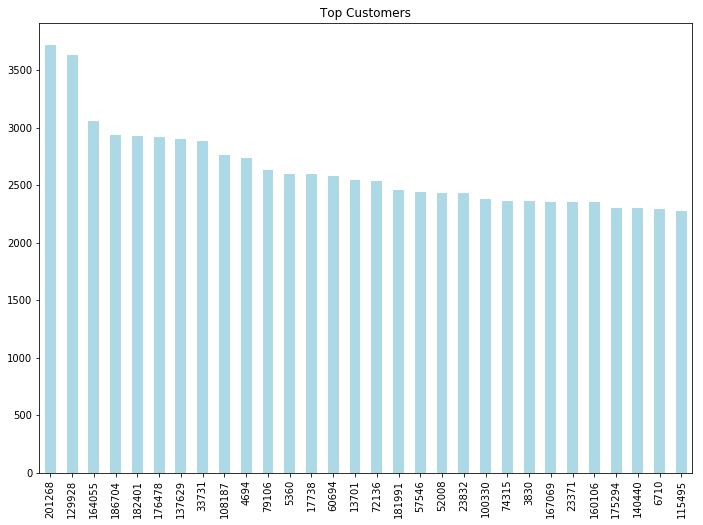

In [71]:
#Assuming user ID = customer ID, here are top 30 customers in terms of products ordered.  Maybe send a coupon their way. 

user_counts = df_all['user_id'].value_counts()

dims = (11.7, 8.27)
fix, ax = plt.subplots(figsize= dims)
user_counts[0:30].plot(kind="bar", color='lightblue')

plt.xticks(rotation=90)
plt.title('Top Customers')
plt.show()


In [82]:
# Next step: Products feature engineering


products_raw = pd.DataFrame()

products_raw['ordersTotal'] = df_all.groupby(df_all.product_id).size()

products_raw['reordersTotal'] = df_all['reordered'].groupby(df_all.product_id).sum()

products_raw['reorder_rate'] = (products_raw.reordersTotal / products_raw.ordersTotal)

products = df_products.join(products_raw, on = 'product_id')
# products_new.set_index('product_id', drop = False, inplace = True)

del products_raw

products.head()

,product_id,product_name,aisle_id,department_id,ordersTotal,reordersTotal,reorder_rate
0,1,Chocolate Sandwich Cookies,61,19,1913.0,1178.0,0.615787
1,2,All-Seasons Salt,104,13,93.0,12.0,0.129032
2,3,Robust Golden Unsweetened Oolong Tea,94,7,281.0,207.0,0.736655
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,345.0,156.0,0.452174
4,5,Green Chile Anytime Sauce,5,13,15.0,9.0,0.600000


In [97]:
#User feature engineering

priors = pd.merge(df_all, df_orders, how = 'left', on = 'order_id')

users = pd.DataFrame()
users['total_user'] = priors.groupby('product_id').size().astype(np.int16)
users['all_users'] = priors.groupby('product_id')['user_id'].apply(set)
users['total_distinct_users_perProduct'] = users.all_users.map(len)

MemoryError: 